In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving World_SeaborneTrade.csv to World_SeaborneTrade.csv


In [3]:
import pandas as pd

df = pd.read_csv("World_SeaborneTrade.csv")

In [4]:
df.head()

,Year,Economy,Economy Label,CargoType,CargoType Label,Metric tons in thousands,Metric tons in thousands Footnote,Metric tons in thousands Missing value
0,2000,0,World,11,Crude oil loaded,1814138.944,NaN,NaN
1,2000,0,World,12,Other tanker trade loaded,1090031.566,NaN,NaN
2,2000,0,World,13,Dry cargo loaded,3341983.338,NaN,NaN
3,2000,0,World,10,Total goods loaded,6246153.848,NaN,NaN
4,2000,0,World,21,Crude oil discharged,1814138.944,NaN,NaN


In [5]:
df.columns

Index(['Year', 'Economy', 'Economy Label', 'CargoType', 'CargoType Label',
       'Metric tons in thousands', 'Metric tons in thousands Footnote',
       'Metric tons in thousands Missing value'],
      dtype='object')

In [6]:
df.dtypes

,0
Year,int64
Economy,int64
Economy Label,object
CargoType,int64
CargoType Label,object
Metric tons in thousands,float64
Metric tons in thousands Footnote,object
Metric tons in thousands Missing value,object


In [7]:
df.isnull().sum()

,0
Year,0
Economy,0
Economy Label,0
CargoType,0
CargoType Label,0
Metric tons in thousands,2850
Metric tons in thousands Footnote,31308
Metric tons in thousands Missing value,51680


In [8]:
df = df[[
    "Year",
    "Economy",
    "Economy Label",
    "CargoType",
    "CargoType Label",
    "Metric tons in thousands"
]]

In [9]:
df["Metric tons in thousands"] = df["Metric tons in thousands"].fillna(0)

In [10]:
df.describe()

,Year,Economy,CargoType,Metric tons in thousands
count,54530.000000,54530.000000,54530.000000,5.453000e+04
mean,2011.536512,1190.984119,16.586686,1.898153e+05
std,6.916027,1641.110982,5.124639,6.920649e+05
min,2000.000000,0.000000,10.000000,0.000000e+00
25%,2006.000000,270.000000,12.000000,1.055263e+02
50%,2012.000000,574.000000,20.000000,3.039892e+03
75%,2018.000000,891.000000,22.000000,4.855283e+04
max,2023.000000,5900.000000,23.000000,1.166217e+07


In [11]:
df["CargoType Label"].unique()

array(['Crude oil loaded', 'Other tanker trade loaded',
       'Dry cargo loaded', 'Total goods loaded', 'Crude oil discharged',
       'Other tanker trade discharged', 'Dry cargo discharged',
       'Total goods discharged'], dtype=object)

In [12]:
list(df["CargoType Label"].unique())

['Crude oil loaded',
 'Other tanker trade loaded',
 'Dry cargo loaded',
 'Total goods loaded',
 'Crude oil discharged',
 'Other tanker trade discharged',
 'Dry cargo discharged',
 'Total goods discharged']

In [13]:
df_case = (
    df[
        (df["Economy Label"] == "World") &
        (df["CargoType Label"] == "Total goods loaded")
    ]
    .sort_values("Year")
    .copy()
)

df_case.head()

,Year,Economy,Economy Label,CargoType,CargoType Label,Metric tons in thousands
3,2000,0,World,10,Total goods loaded,6246153.848
2249,2001,0,World,10,Total goods loaded,6285357.076
4495,2002,0,World,10,Total goods loaded,6465823.413
6750,2003,0,World,10,Total goods loaded,6826225.425
9004,2004,0,World,10,Total goods loaded,7401451.572


In [16]:
cargo_list = df["CargoType Label"].unique()

for cargo in cargo_list:

    print(f"\n===== {cargo} =====")

    d = df[(df["CargoType Label"] == cargo) & (df["Economy Label"] == "World")].sort_values("Year")

    y = pd.Series(
        d["Metric tons in thousands"].values / 1000,
        index=pd.to_datetime(d["Year"], format="%Y")
    ).asfreq("YS")

    train = y[y.index.year <= 2018]
    test  = y[y.index.year >= 2019]

    print("Train points:", len(train))
    print("Test points :", len(test))


===== Crude oil loaded =====
Train points: 19
Test points : 5

===== Other tanker trade loaded =====
Train points: 19
Test points : 5

===== Dry cargo loaded =====
Train points: 19
Test points : 5

===== Total goods loaded =====
Train points: 19
Test points : 5

===== Crude oil discharged =====
Train points: 19
Test points : 5

===== Other tanker trade discharged =====
Train points: 19
Test points : 5

===== Dry cargo discharged =====
Train points: 19
Test points : 5

===== Total goods discharged =====
Train points: 19
Test points : 5


In [17]:
y_diff = y.diff().dropna()

In [19]:
from statsmodels.tsa.stattools import adfuller

adf_result_diff = adfuller(y_diff)

print("ADF Statistic (diff):", adf_result_diff[0])
print("p-value (diff):", adf_result_diff[1])

ADF Statistic (diff): -4.787272054367672
p-value (diff): 5.7518445720697934e-05


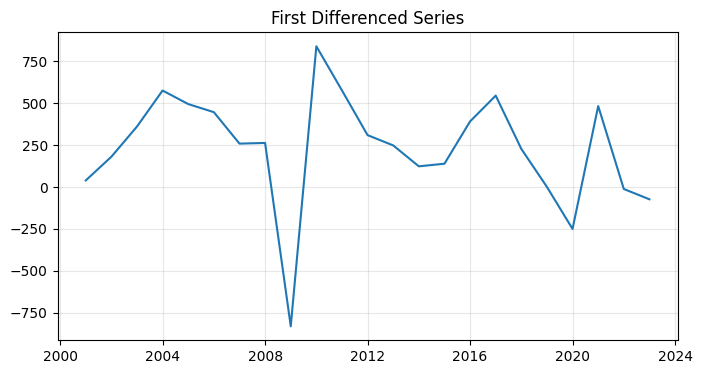

In [20]:
y_diff1 = y.diff().dropna()

plt.figure(figsize=(8,4))
plt.plot(y_diff1)
plt.title("First Differenced Series")
plt.grid(alpha=0.3)
plt.show()

In [21]:
train = y[y.index.year <= 2018]
test  = y[y.index.year >= 2019]


print("Train points:", len(train))
print("Test points :", len(test))


Train points: 19
Test points : 5


In [22]:
# ===============================
# Paper split (Train / Test)
# ===============================
train = y[y.index.year <= 2018]
test  = y[y.index.year >= 2019]

print("Paper split:")
print("Train:", train.index.year.min(), "→", train.index.year.max(), "| n =", len(train))
print("Test :", test.index.year.min(), "→", test.index.year.max(), "| n =", len(test))

Paper split:
Train: 2000 → 2018 | n = 19
Test : 2019 → 2023 | n = 5


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def pe_paper(rmse_value, y_true):
    return (rmse_value / np.mean(y_true)) * 100

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# -----------------------------------
# Case name
# -----------------------------------
case_name = "World Total Vessel Demand"

# -----------------------------------
# Manual ARIMA order (from Table 1)
# -----------------------------------
manual_order = (4, 1, 0)

# -----------------------------------
# Fit model
# -----------------------------------
manual_fit = ARIMA(train, order=manual_order).fit()

print(f"=== {case_name} | ARIMA{manual_order} ===")
print(manual_fit.summary())

=== World Total Vessel Demand | ARIMA(4, 1, 0) ===
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -132.817
Date:                Fri, 26 Dec 2025   AIC                            275.633
Time:                        19:26:40   BIC                            280.085
Sample:                    01-01-2000   HQIC                           276.247
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1315      0.201      0.653      0.514      -0.263       0.526
ar.L2          0.1167      0.302      0.386      0.699      -0.476       0.710
a

In [25]:
d = manual_order[1]

# ------------------------
# Train fit (in-sample)
# ------------------------
pred_train_m = manual_fit.predict(
    start=train.index[d],
    end=train.index[-1],
    typ="levels"
)
train_eval_m = train.iloc[d:]

rmse_train_m = rmse(train_eval_m, pred_train_m)
pe_train_m   = pe_paper(rmse_train_m, train_eval_m)

# ------------------------
# Test forecast (out-of-sample)
# ------------------------
pred_test_m = manual_fit.forecast(steps=len(test))
pred_test_m = np.asarray(pred_test_m)
pred_test_m = pd.Series(pred_test_m, index=test.index)

rmse_test_m = rmse(test, pred_test_m)
pe_test_m   = pe_paper(rmse_test_m, test)

print("\n--- MANUAL ARIMA (Paper) ---")
print("Order     :", manual_order)
print(f"RMSE_train: {rmse_train_m:.2f}")
print(f"RMSE_test : {rmse_test_m:.2f}")
print(f"PE_train  : {pe_train_m:.2f}%")
print(f"PE_test   : {pe_test_m:.2f}%")


--- MANUAL ARIMA (Paper) ---
Order     : (4, 1, 0)
RMSE_train: 384.35
RMSE_test : 477.19
PE_train  : 4.31%
PE_test   : 4.15%


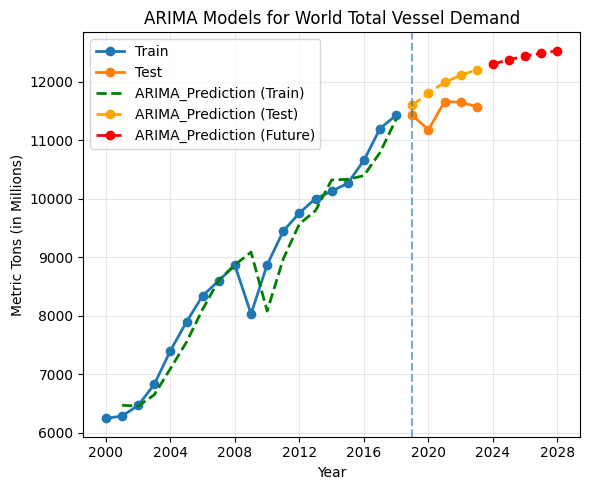

In [26]:
plt.figure(figsize=(6,5))

# Actual
plt.plot(train, label="Train", marker="o", linewidth=2)
plt.plot(test, label="Test", marker="o", linewidth=2)

# In-sample prediction (Train)
plt.plot(pred_train_m, label="ARIMA_Prediction (Train)", linestyle="--", color="green", linewidth=2)

# Out-of-sample prediction (Test)
plt.plot(pred_test_m, label="ARIMA_Prediction (Test)", linestyle="--", color="orange", marker="o", linewidth=2)

# Forecasting into the future
future_steps = 5
future_forecast = manual_fit.forecast(steps=len(test)+future_steps)
future_index = pd.date_range(start=test.index[-1] + pd.DateOffset(years=1), periods=future_steps, freq="YS")
future_series = pd.Series(future_forecast[-future_steps:].values, index=future_index)

plt.plot(future_series, label="ARIMA_Prediction (Future)", linestyle="--", color="red", marker="o", linewidth=2)

# Formatting
plt.axvline(test.index[0], linestyle="--", alpha=0.6)
plt.title("ARIMA Models for World Total Vessel Demand")
plt.xlabel("Year")
plt.ylabel("Metric Tons (in Millions)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.5 MB/s eta 0:00:00


In [28]:
from pmdarima import auto_arima

auto_model = auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=8, max_q=8,
    seasonal=False,
    d=None,
    stepwise=True,
    suppress_warnings=True,
    error_action="ignore",
    trace=False
)

auto_order = auto_model.order
d_auto = auto_order[1]
print("Auto ARIMA order:", auto_order)

Auto ARIMA order: (0, 1, 0)


In [29]:
auto_fit = ARIMA(train, order=auto_order).fit()

In [30]:
pred_train_auto = auto_fit.predict(
    start=train.index[d_auto],
    end=train.index[-1],
    typ="levels"
)
train_eval_auto = train.iloc[d_auto:]

In [31]:
pred_test_auto = auto_fit.forecast(steps=len(test))
pred_test_auto = pd.Series(pred_test_auto, index=test.index)

In [32]:
rmse_train_auto = rmse(train_eval_auto, pred_train_auto)
pe_train_auto = pe_paper(rmse_train_auto, train_eval_auto)

rmse_test_auto = rmse(test, pred_test_auto)
pe_test_auto = pe_paper(rmse_test_auto, test)

In [33]:
print("\n--- AUTO ARIMA ---")
print("Order     :", auto_order)
print(f"RMSE_train: {rmse_train_auto:.2f}")
print(f"RMSE_test : {rmse_test_auto:.2f}")
print(f"PE_train  : {pe_train_auto:.2f}%")
print(f"PE_test   : {pe_test_auto:.2f}%")


--- AUTO ARIMA ---
Order     : (0, 1, 0)
RMSE_train: 440.49
RMSE_test : 193.46
PE_train  : 4.94%
PE_test   : 1.68%


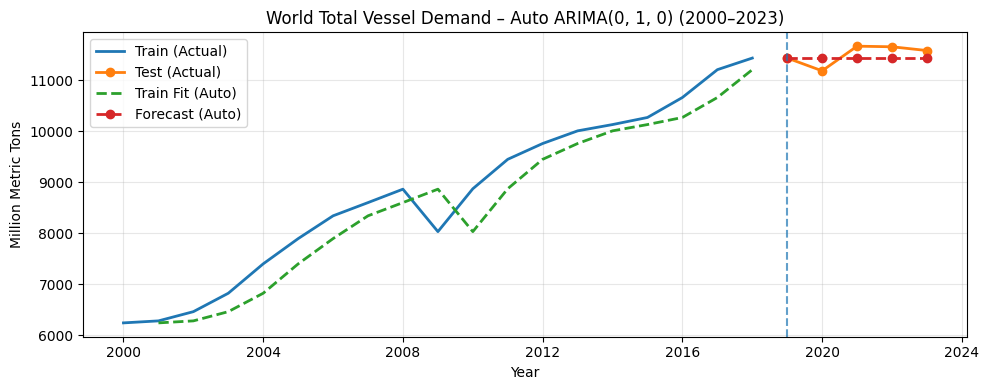

In [34]:
plt.figure(figsize=(10,4))

plt.plot(train, label="Train (Actual)", linewidth=2)
plt.plot(test, label="Test (Actual)", marker="o", linewidth=2)

plt.plot(train.index[d_auto:], pred_train_auto, "--", label="Train Fit (Auto)", linewidth=2)
plt.plot(pred_test_auto, "--o", label="Forecast (Auto)", linewidth=2)

plt.axvline(test.index[0], linestyle="--", alpha=0.7)

plt.title(f"{case_name} – Auto ARIMA{auto_order} (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Million Metric Tons")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
df_crude = df[
    (df["Economy Label"] == "World") &
    (df["CargoType Label"] == "Crude oil loaded")
].sort_values("Year").copy()

In [36]:
df_dry = df[
    (df["Economy Label"] == "World") &
    (df["CargoType Label"] == "Dry cargo loaded")
].sort_values("Year").copy()

In [37]:
df_other = df[
    (df["Economy Label"] == "World") &
    (df["CargoType Label"] == "Other tanker trade loaded")
].sort_values("Year").copy()

In [38]:
print("Crude:", df_crude["Year"].min(), "→", df_crude["Year"].max())
print("Dry:", df_dry["Year"].min(), "→", df_dry["Year"].max())
print("Other:", df_other["Year"].min(), "→", df_other["Year"].max())

Crude: 2000 → 2023
Dry: 2000 → 2023
Other: 2000 → 2023


In [ ]:
y = df_cargo.set_index("Year")["Metric tons in thousands"] / 1000
y.index = pd.to_datetime(y.index.astype(str) + "-01-01")

train = y[y.index.year <= 2018]
test  = y[y.index.year >= 2019]


from statsmodels.tsa.arima.model import ARIMA

order = (3, 1, 5)
d = order[1]

model = ARIMA(
    train,
    order=order,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

pred_train = model.predict(
    start=train.index[d],
    end=train.index[-1],
    typ="levels"
)
train_eval = train.iloc[d:]

pred_test = model.forecast(steps=len(test))
pred_test = pd.Series(pred_test, index=test.index)

rmse_train = rmse(train_eval, pred_train)
pe_train = pe_paper(rmse_train, train_eval)

rmse_test = rmse(test, pred_test)
pe_test = pe_paper(rmse_test, test)

print("\n=== World crude oil vessel — ARIMA(3,1,5) ===")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"PE Train  : {pe_train:.2f}%")
print(f"RMSE Test : {rmse_test:.2f}")
print(f"PE Test   : {pe_test:.2f}%")



=== World crude oil vessel — ARIMA(3,1,5) ===
RMSE Train: 184.61
PE Train  : 9.27%
RMSE Test : 78.89
PE Test   : 3.88%


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


NameError: name 'pred_train' is not defined

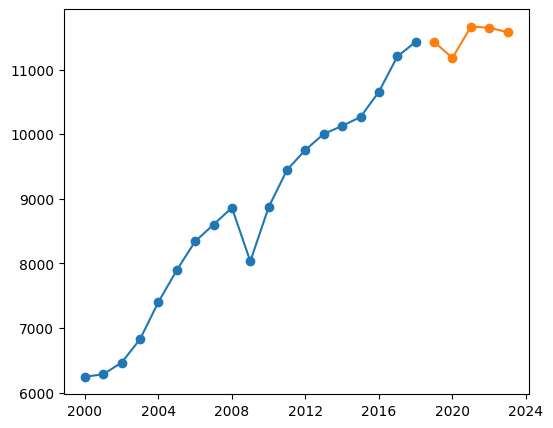

In [39]:
plt.figure(figsize=(6, 5))

# Actual
plt.plot(train, label="Train", marker='o')
plt.plot(test, label="Test", marker='o')

# Train prediction
plt.plot(train.index[d:], pred_train, "--", label="ARIMA_Prediction (Train)", color="green")

# Test prediction
plt.plot(pred_test, "--o", label="ARIMA_Prediction (Test)", color="orange")

# Future forecast
future_steps = 5
future_forecast = model.forecast(steps=len(test) + future_steps)
future_index = pd.date_range(start=test.index[-1] + pd.DateOffset(years=1), periods=future_steps, freq="YS")
plt.plot(future_index, future_forecast[-future_steps:], "--o", label="ARIMA_Prediction (Future)", color="red")

plt.axvline(test.index[0], linestyle="--", alpha=0.7)

plt.title("ARIMA Models for World Crude Oil Vessel Demand")
plt.xlabel("Year")
plt.ylabel("Metric Tons (in Millions)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
orders_to_try = [
    (2, 1, 2),
    (3, 1, 2),
    (2, 1, 3),
    (3, 1, 3),
    (4, 1, 2),
]

results = []

for order in orders_to_try:
    try:
        d = order[1]
        model = ARIMA(train, order=order, enforce_stationarity=False, enforce_invertibility=False).fit()

        pred_train = model.predict(start=train.index[d], end=train.index[-1], typ="levels")
        train_eval = train.iloc[d:]

        pred_test = model.forecast(steps=len(test))
        pred_test = pd.Series(pred_test, index=test.index)

        rmse_train = rmse(train_eval, pred_train)
        pe_train = pe_paper(rmse_train, train_eval)
        rmse_test = rmse(test, pred_test)
        pe_test = pe_paper(rmse_test, test)

        results.append({
            "Order": order,
            "RMSE_Train": rmse_train,
            "PE_Train": pe_train,
            "RMSE_Test": rmse_test,
            "PE_Test": pe_test
        })

    except Exception as e:
        print(f"❌ Failed for order {order}: {e}")

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
import pandas as pd

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="PE_Test")
print("=== ARIMA Model Comparison ===")
print(df_results.to_string(index=False))

=== ARIMA Model Comparison ===
    Order  RMSE_Train  PE_Train  RMSE_Test  PE_Test
(3, 1, 2) 1083.138989 12.149071 380.619691 3.309825
(4, 1, 2)  488.072626  5.474486 420.603096 3.657516
(3, 1, 3) 1206.298042 13.530489 445.989138 3.878270
(2, 1, 3)  695.439595  7.800425 538.982288 4.686927
(2, 1, 2)  664.706947  7.455712 561.754352 4.884950


In [42]:
best_order = (3, 1, 3)

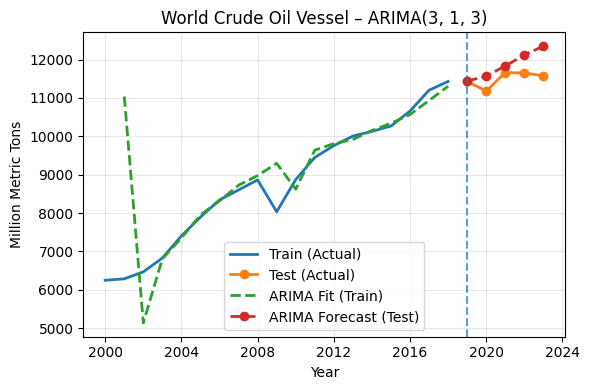

In [47]:
model_best = ARIMA(train, order=best_order, enforce_stationarity=False, enforce_invertibility=False).fit()

d_best = best_order[1]
pred_train = model_best.predict(start=train.index[d_best], end=train.index[-1], typ="levels")
train_eval = train.iloc[d_best:]

pred_test = model_best.forecast(steps=len(test))
pred_test = pd.Series(pred_test, index=test.index)

plt.figure(figsize=(6,4))
plt.plot(train, label="Train (Actual)", linewidth=2)
plt.plot(test, label="Test (Actual)", marker="o", linewidth=2)
plt.plot(train.index[d_best:], pred_train, "--", label="ARIMA Fit (Train)", linewidth=2)
plt.plot(pred_test, "--o", label="ARIMA Forecast (Test)", linewidth=2)
plt.axvline(test.index[0], linestyle="--", alpha=0.7)
plt.title(f"World Crude Oil Vessel – ARIMA{best_order}")
plt.xlabel("Year")
plt.ylabel("Million Metric Tons")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
df_dry = df[
    (df["Economy Label"] == "World") &
    (df["CargoType Label"] == "Dry cargo loaded")
].sort_values("Year").copy()

y_dry = df_dry.set_index("Year")["Metric tons in thousands"] / 1000
y_dry.index = pd.to_datetime(y_dry.index, format="%Y")
y_dry = y_dry.sort_index().asfreq("YS")

train_dry = y_dry[y_dry.index.year <= 2018]
test_dry  = y_dry[y_dry.index.year >= 2019]

In [49]:
manual_order_dry = (3, 1, 3)
d = manual_order_dry[1]

In [50]:
from statsmodels.tsa.arima.model import ARIMA

model_dry = ARIMA(train_dry, order=manual_order_dry, enforce_stationarity=False, enforce_invertibility=False).fit()

pred_train_dry = model_dry.predict(start=train_dry.index[d], end=train_dry.index[-1], typ="levels")
train_eval_dry = train_dry.iloc[d:]

pred_test_dry = model_dry.forecast(steps=len(test_dry))
pred_test_dry = pd.Series(pred_test_dry, index=test_dry.index)

rmse_train_dry = rmse(train_eval_dry, pred_train_dry)
pe_train_dry = pe_paper(rmse_train_dry, train_eval_dry)

rmse_test_dry = rmse(test_dry, pred_test_dry)
pe_test_dry = pe_paper(rmse_test_dry, test_dry)

print("\n=== World Dry Cargo Vessel – Manual ARIMA(3,1,3) ===")
print(f"RMSE Train: {rmse_train_dry:.2f}")
print(f"PE Train  : {pe_train_dry:.2f}%")
print(f"RMSE Test : {rmse_test_dry:.2f}")
print(f"PE Test   : {pe_test_dry:.2f}%")


=== World Dry Cargo Vessel – Manual ARIMA(3,1,3) ===
RMSE Train: 413.07
PE Train  : 7.82%
RMSE Test : 162.52
PE Test   : 2.25%


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


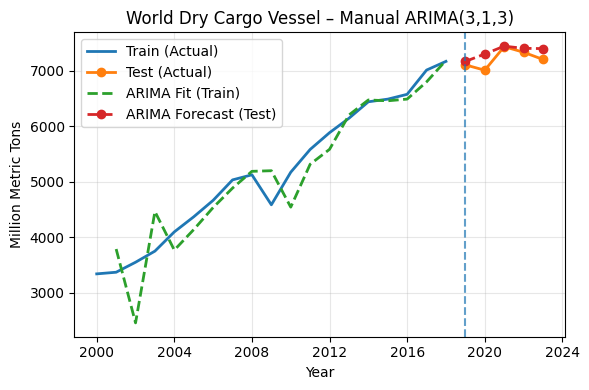

In [51]:
plt.figure(figsize=(6,4))
plt.plot(train_dry, label="Train (Actual)", linewidth=2)
plt.plot(test_dry, label="Test (Actual)", marker="o", linewidth=2)
plt.plot(train_dry.index[d:], pred_train_dry, "--", label="ARIMA Fit (Train)", linewidth=2)
plt.plot(pred_test_dry, "--o", label="ARIMA Forecast (Test)", linewidth=2)
plt.axvline(test_dry.index[0], linestyle="--", alpha=0.7)
plt.title("World Dry Cargo Vessel – Manual ARIMA(3,1,3)")
plt.xlabel("Year")
plt.ylabel("Million Metric Tons")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
from pmdarima import auto_arima

# Run Auto ARIMA on Dry Cargo training data
auto_model_dry = auto_arima(
    train_dry,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=None,
    seasonal=False,
    stepwise=True,
    n_fits=30,
    suppress_warnings=True,
    error_action="ignore",
    trace=True
)

# Extract best ARIMA order
auto_order_dry = auto_model_dry.order
d_auto_dry = auto_order_dry[1]

print("\nBest Auto ARIMA order found:", auto_order_dry)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=251.032, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=252.656, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=260.073, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=255.031, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.256 seconds

Best Auto ARIMA order found: (0, 1, 0)


In [53]:
from statsmodels.tsa.arima.model import ARIMA

model_auto_dry = ARIMA(
    train_dry,
    order=auto_order_dry,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

pred_train_auto_dry = model_auto_dry.predict(
    start=train_dry.index[d_auto_dry],
    end=train_dry.index[-1],
    typ="levels"
)
train_eval_auto_dry = train_dry.iloc[d_auto_dry:]

pred_test_auto_dry = model_auto_dry.forecast(steps=len(test_dry))
pred_test_auto_dry = pd.Series(pred_test_auto_dry, index=test_dry.index)

rmse_train_auto_dry = rmse(train_eval_auto_dry, pred_train_auto_dry)
pe_train_auto_dry = pe_paper(rmse_train_auto_dry, train_eval_auto_dry)

rmse_test_auto_dry = rmse(test_dry, pred_test_auto_dry)
pe_test_auto_dry = pe_paper(rmse_test_auto_dry, test_dry)

print("\n=== World Dry Cargo – Auto ARIMA(0,1,0) ===")
print(f"RMSE Train: {rmse_train_auto_dry:.2f}")
print(f"PE Train  : {pe_train_auto_dry:.2f}%")
print(f"RMSE Test : {rmse_test_auto_dry:.2f}")
print(f"PE Test   : {pe_test_auto_dry:.2f}%")


=== World Dry Cargo – Auto ARIMA(0,1,0) ===
RMSE Train: 314.12
PE Train  : 5.95%
RMSE Test : 159.79
PE Test   : 2.21%


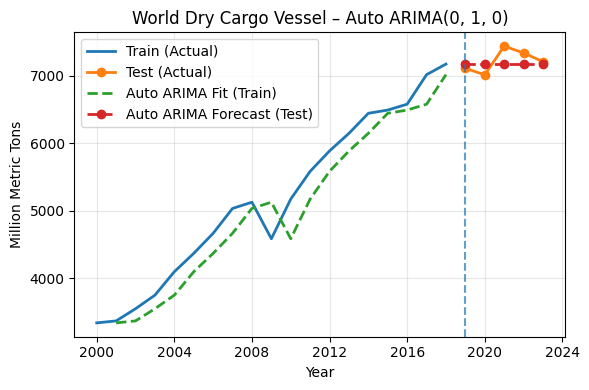

In [54]:
plt.figure(figsize=(6,4))
plt.plot(train_dry, label="Train (Actual)", linewidth=2)
plt.plot(test_dry, label="Test (Actual)", marker="o", linewidth=2)
plt.plot(train_dry.index[d_auto_dry:], pred_train_auto_dry, "--", label="Auto ARIMA Fit (Train)", linewidth=2)
plt.plot(pred_test_auto_dry, "--o", label="Auto ARIMA Forecast (Test)", linewidth=2)
plt.axvline(test_dry.index[0], linestyle="--", alpha=0.7)
plt.title(f"World Dry Cargo Vessel – Auto ARIMA{auto_order_dry}")
plt.xlabel("Year")
plt.ylabel("Million Metric Tons")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
df_other = df[
    (df["Economy Label"] == "World") &
    (df["CargoType Label"] == "Other tanker trade loaded")
].sort_values("Year").copy()

y_other = df_other.set_index("Year")["Metric tons in thousands"] / 1000
y_other.index = pd.to_datetime(y_other.index, format="%Y")
y_other = y_other.sort_index().asfreq("YS")

In [56]:
train_other = y_other[y_other.index.year <= 2018]
test_other  = y_other[y_other.index.year >= 2019]

In [57]:
from statsmodels.tsa.arima.model import ARIMA

order_other = (6, 1, 1)
d = order_other[1]

model_other = ARIMA(train_other, order=order_other, enforce_stationarity=False, enforce_invertibility=False).fit()

pred_train_other = model_other.predict(start=train_other.index[d], end=train_other.index[-1], typ="levels")
train_eval_other = train_other.iloc[d:]

pred_test_other = model_other.forecast(steps=len(test_other))
pred_test_other = pd.Series(pred_test_other, index=test_other.index)


rmse_train_other = rmse(train_eval_other, pred_train_other)
pe_train_other = pe_paper(rmse_train_other, train_eval_other)

rmse_test_other = rmse(test_other, pred_test_other)
pe_test_other = pe_paper(rmse_test_other, test_other)

print("\n=== World Other Tanker Trade – Manual ARIMA(6,1,1) ===")
print(f"RMSE Train: {rmse_train_other:.2f}")
print(f"PE Train  : {pe_train_other:.2f}%")
print(f"RMSE Test : {rmse_test_other:.2f}")
print(f"PE Test   : {pe_test_other:.2f}%")


=== World Other Tanker Trade – Manual ARIMA(6,1,1) ===
RMSE Train: 89.56
PE Train  : 5.45%
RMSE Test : 85.78
PE Test   : 3.82%


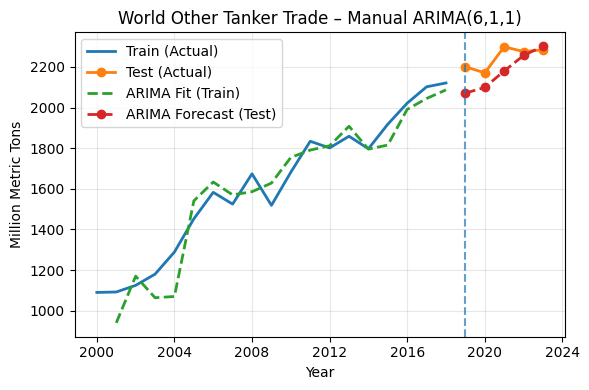

In [58]:
plt.figure(figsize=(6,4))
plt.plot(train_other, label="Train (Actual)", linewidth=2)
plt.plot(test_other, label="Test (Actual)", marker="o", linewidth=2)
plt.plot(train_other.index[d:], pred_train_other, "--", label="ARIMA Fit (Train)", linewidth=2)
plt.plot(pred_test_other, "--o", label="ARIMA Forecast (Test)", linewidth=2)
plt.axvline(test_other.index[0], linestyle="--", alpha=0.7)
plt.title("World Other Tanker Trade – Manual ARIMA(6,1,1)")
plt.xlabel("Year")
plt.ylabel("Million Metric Tons")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
orders_to_try = [
    (3, 1, 1),
    (4, 1, 1),
    (5, 1, 1),
    (3, 1, 2),
    (4, 1, 2),
    (5, 1, 2),
    (6, 1, 2),
    (6, 1, 3),
]

In [60]:
results = []

for order in orders_to_try:
    try:
        model = ARIMA(train_other, order=order, enforce_stationarity=False, enforce_invertibility=False).fit()

        d = order[1]
        pred_train = model.predict(start=train_other.index[d], end=train_other.index[-1], typ="levels")
        train_eval = train_other.iloc[d:]

        pred_test = model.forecast(steps=len(test_other))
        pred_test = pd.Series(pred_test, index=test_other.index)

        rmse_tr = rmse(train_eval, pred_train)
        pe_tr   = pe_paper(rmse_tr, train_eval)

        rmse_te = rmse(test_other, pred_test)
        pe_te   = pe_paper(rmse_te, test_other)

        results.append((order, rmse_tr, pe_tr, rmse_te, pe_te))

    except Exception as e:
        print(f"❌ Failed for {order}: {e}")

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Order", "RMSE_Train", "PE_Train", "RMSE_Test", "PE_Test"])
results_df = results_df.sort_values("PE_Test")
print("\n=== ARIMA Model Comparison ===")
print(results_df)


=== ARIMA Model Comparison ===
       Order  RMSE_Train  PE_Train   RMSE_Test   PE_Test
0  (3, 1, 1)  111.172379  6.766001   37.768453  1.681318
3  (3, 1, 2)  130.372675  7.934539   38.562034  1.716645
4  (4, 1, 2)  136.738482  8.321965   59.973827  2.669822
7  (6, 1, 3)   99.203005  6.037539   82.917522  3.691194
5  (5, 1, 2)  139.735132  8.504343   88.581104  3.943317
1  (4, 1, 1)  124.191210  7.558333  109.549192  4.876742
2  (5, 1, 1)   96.764848  5.889152  111.002358  4.941432
6  (6, 1, 2)  110.105837  6.701091  126.786846  5.644101


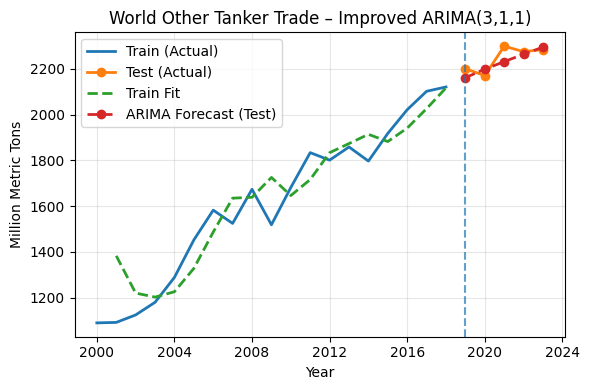

In [62]:
order_best = (3, 1, 1)
d = order_best[1]

model_best = ARIMA(train_other, order=order_best, enforce_stationarity=False, enforce_invertibility=False).fit()

pred_train_best = model_best.predict(start=train_other.index[d], end=train_other.index[-1], typ="levels")
train_eval_best = train_other.iloc[d:]

pred_test_best = model_best.forecast(steps=len(test_other))
pred_test_best = pd.Series(pred_test_best, index=test_other.index)

plt.figure(figsize=(6,4))
plt.plot(train_other, label="Train (Actual)", linewidth=2)
plt.plot(test_other, label="Test (Actual)", marker="o", linewidth=2)
plt.plot(train_other.index[d:], pred_train_best, "--", label="Train Fit", linewidth=2)
plt.plot(pred_test_best, "--o", label="ARIMA Forecast (Test)", linewidth=2)
plt.axvline(test_other.index[0], linestyle="--", alpha=0.7)
plt.title("World Other Tanker Trade – Improved ARIMA(3,1,1)")
plt.xlabel("Year")
plt.ylabel("Million Metric Tons")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

def prepare_case(df, cargo_label, arima_order):
    df_case = df[
        (df["Economy Label"] == "World") &
        (df["CargoType Label"] == cargo_label)
    ].sort_values("Year").copy()

    y = df_case.set_index("Year")["Metric tons in thousands"] / 1000
    y.index = pd.to_datetime(y.index, format="%Y")
    y = y.sort_index().asfreq("YS")

    train = y[y.index.year <= 2018]
    test = y[y.index.year >= 2019]

    model = ARIMA(train, order=arima_order).fit()
    d = arima_order[1]

    pred_train = model.predict(
        start=train.index[d],
        end=train.index[-1],
        typ="levels"
    )
    train_eval = train.iloc[d:]

    pred_test = model.forecast(steps=len(test))
    pred_test = pd.Series(pred_test, index=test.index)

    return {
        "name": cargo_label,
        "model": model,
        "train": train,
        "test": test,
        "pred_train": pred_train,
        "pred_test": pred_test
    }

case_crude = prepare_case(df, "Crude oil loaded", (3, 1, 5))
case_dry = prepare_case(df, "Dry cargo loaded", (3, 1, 3))
case_other = prepare_case(df, "Other tanker trade loaded", (3, 1, 1))
case_total = prepare_case(df, "Total goods loaded", (4, 1, 0))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels


--- Processing Case: World Crude Oil Vessel ---
last_year_in_train = 2018
last_year_in_test  = 2023
total_forecast_steps = 9


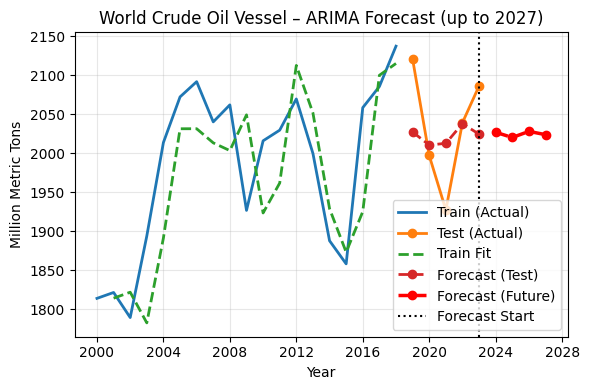


--- Processing Case: World Dry Cargo Vessel ---
last_year_in_train = 2018
last_year_in_test  = 2023
total_forecast_steps = 9


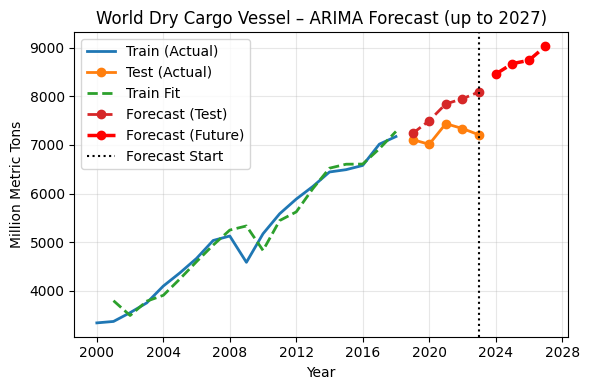


--- Processing Case: World Other Tanker Trade Vessel ---
last_year_in_train = 2018
last_year_in_test  = 2023
total_forecast_steps = 9


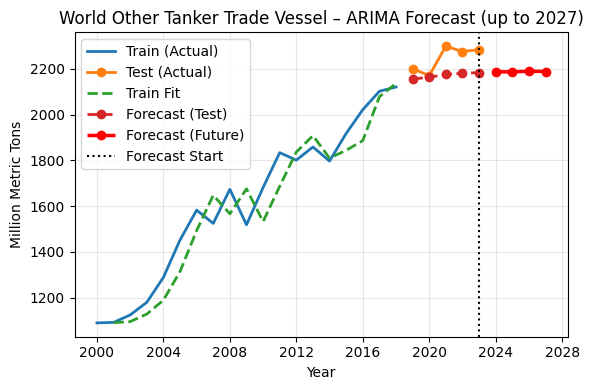


--- Processing Case: World Total Vessel ---
last_year_in_train = 2018
last_year_in_test  = 2023
total_forecast_steps = 9


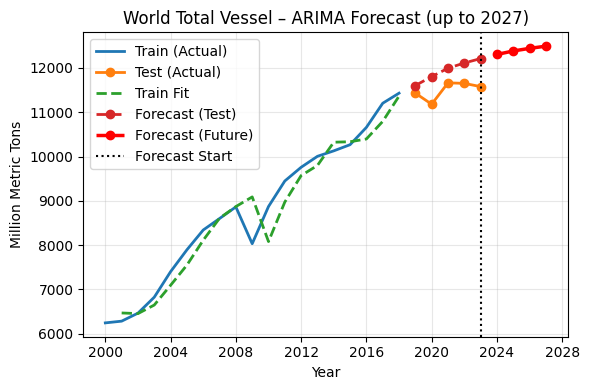

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

forecast_end_year = 2027

for case in cases:
    name = case["name"]
    model = case["model"]          # statsmodels ARIMAResults
    train = case["train"]
    test = case["test"]
    pred_train = case["pred_train"]
    pred_test = case["pred_test"]

    last_year_in_train = train.index.year.max()
    last_year_in_test = test.index.year.max()

    # --------------------------------------------------
    # Total steps from end of TRAIN to forecast_end_year
    # --------------------------------------------------
    total_forecast_steps = forecast_end_year - last_year_in_train

    print(f"\n--- Processing Case: {name} ---")
    print(f"last_year_in_train = {last_year_in_train}")
    print(f"last_year_in_test  = {last_year_in_test}")
    print(f"total_forecast_steps = {total_forecast_steps}")

    if total_forecast_steps <= 0:
        print("⚠️ No future steps to forecast – skipped")
        continue

    # --------------------------------------------------
    # FULL forecast from end of TRAIN
    # (covers test + future)
    # --------------------------------------------------
    full_forecast = model.predict(
        start=len(train),
        end=len(train) + total_forecast_steps - 1
    )

    # --------------------------------------------------
    # Extract FUTURE part only (after test)
    # --------------------------------------------------
    years_beyond_test = forecast_end_year - last_year_in_test

    if years_beyond_test <= 0:
        print("⚠️ No future years beyond test – skipped")
        continue

    future_index = pd.date_range(
        start=test.index[-1] + pd.DateOffset(years=1),
        periods=years_beyond_test,
        freq="YS"
    )

    forecast_future = pd.Series(
        full_forecast[len(test):].values,
        index=future_index
    )

    # --------------------------------------------------
    # Plot
    # --------------------------------------------------
    plt.figure(figsize=(6, 4))

    # Actual data
    plt.plot(train, label="Train (Actual)", linewidth=2)
    plt.plot(test, label="Test (Actual)", marker="o", linewidth=2)

    # Model fit
    plt.plot(pred_train, "--", label="Train Fit", linewidth=2)
    plt.plot(pred_test, "--o", label="Forecast (Test)", linewidth=2)

    # Future forecast
    plt.plot(
        forecast_future,
        "--o",
        color="red",
        linewidth=2.5,
        label="Forecast (Future)"
    )

    # Forecast start line
    plt.axvline(
        test.index[-1],
        linestyle=":",
        color="black",
        linewidth=1.5,
        label="Forecast Start"
    )

    plt.title(f"{name} – ARIMA Forecast (up to {forecast_end_year})")
    plt.xlabel("Year")
    plt.ylabel("Million Metric Tons")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
